### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
df = pd.read_csv("..\\Practica\\data\\drugLibTrain_raw.tsv", sep="\t")

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [62]:
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [63]:
df.nunique()[df.nunique() <= 10]

rating           10
effectiveness     5
sideEffects       5
dtype: int64

In [64]:
df_1 = df[["rating", "effectiveness", "sideEffects"]]
df_1

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects
...,...,...,...
3102,10,Highly Effective,Mild Side Effects
3103,1,Ineffective,Extremely Severe Side Effects
3104,2,Marginally Effective,Moderate Side Effects
3105,8,Considerably Effective,Mild Side Effects


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [65]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [66]:
my_dict2 = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

In [67]:
df_2 = df_1.copy()
df_2["effectiveness"] = df_2["effectiveness"].map(my_dict)

In [68]:
df_3 = df_2.copy()
df_3["sideEffects"] = df_3["sideEffects"].map(my_dict2)

In [69]:
df_3

,rating,effectiveness,sideEffects
0,4,4,1
1,1,4,3
2,10,4,0
3,3,1,1
4,2,1,3
...,...,...,...
3102,10,4,1
3103,1,0,4
3104,2,1,2
3105,8,3,1


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [99]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [88]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_3)
                for k in range(2, 21)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Mayor silhouette scores con K=2

In [93]:
silhouette_scores = [silhouette_score(df_3, model.labels_)
                     for model in kmeans_per_k]

In [94]:
silhouette_scores

[0.6190969508782411,
 0.4541665291694327,
 0.416701237123931,
 0.4152173517501398,
 0.40776675491666886,
 0.4044764199227224,
 0.3887036746255966,
 0.4139468434587661,
 0.40740876245511143,
 0.4310097927318671,
 0.41912862408038365,
 0.45984445240995503,
 0.4448386290466004,
 0.4811118973055916,
 0.4695772796209039,
 0.46198189887903474,
 0.484789428962796,
 0.4984087298544331,
 0.5211853528472431]

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
df_kmeans['diff%'] = df_kmeans['inertia']/df_kmeans['inertia_1']
df_kmeans

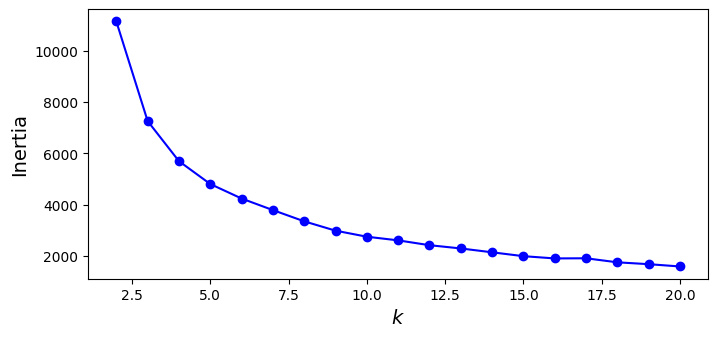

In [98]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 21), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

#plt.axis([1, 8.5, 0, 1300])
#save_fig("inertia_vs_k_plot")
plt.show()

In [100]:
kmeans = KMeans(2, random_state=42).fit(df_3)

c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [101]:
df_cluster = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

<Axes: ylabel='count'>

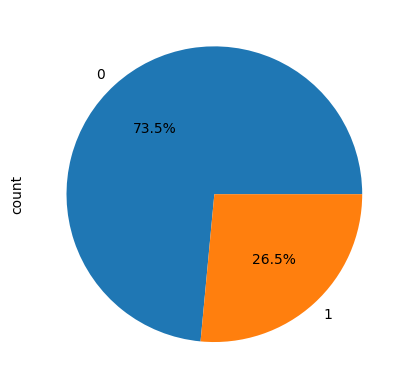

In [102]:
df_cluster['Cluster'].value_counts().plot.pie(autopct="%.1f%%")